Python是一种同时支持面向过程和面向对象编程的语言，浅显的说就是：  
- 面向过程编程，我们可以在一个.py文件中只写上我们的处理函数，其他模块想要调用的话只需要引入即可
- 而对于面向对象编程，我们可以把实物进行概念性的抽象，提取共同点，把相同的属性和行为进行封装

其实对于面向过程和面向对象，真正理解起来不是这么简单的说法，但是这是最大的区别而已，《代码整洁之道》一书中对面向过程和面向对象编程的描述就较为深刻，它让我清楚的认识到我对面向过程和面向对象的理解只是我的理解而已，有兴趣的同学可以去看一看

# 面向过程

## 函数


### 定义函数

在Python中可以使用`def`关键字来定义函数，和变量一样，每个函数也有一个响亮的名字，而且命名规则跟变量的命名规则是一致的。在函数名后面的圆括号中可以放置传递给函数的参数，这一点和数学上的函数非常相似，程序中函数的参数就相当于是数学上说的函数的自变量，而函数执行完成后我们可以通过`return`关键字来返回一个值，这相当于数学上说的函数的因变量

一道数学题：请说出下面的方程有多少组正整数解。

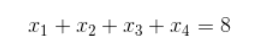

事实上，上面的问题等同于将8个苹果分成四组每组至少一个苹果有多少种方案

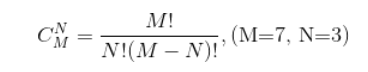

编程实现：

In [1]:
def factorial(num):
    """求阶乘"""
    result = 1
    for n in range(1, num + 1):
        result *= n
    return result


m = int(input('m = '))
n = int(input('n = '))
# 当需要计算阶乘的时候不用再写循环求阶乘而是直接调用已经定义好的函数
print(factorial(m) // factorial(n) // factorial(m - n))

KeyboardInterrupt: Interrupted by user

Pytohn这种支持面向过程的语言在一些场景之下使用起来很方便，如果是使用Java这种纯面向对象的语言，我们在这里就免不了要创建一个类，还有它的具体方法

### 函数的参数

Python并<font color='red' size=3>不支持函数的重载</font>，它的函数的参数可以有默认值，也支持使用可变参数  

因此我们在定义一个函数的时候可以让它有多种不同的使用方式，这跟其他很多语言中函数重载的效果是一致的重载对于Python来说也是多此一举

In [ ]:
from random import randint


def roll_dice(n=2):
    """摇色子"""
    total = 0
    for _ in range(n):
        total += randint(1, 6)
    return total


def add(a=0, b=0, c=0):
    """三个数相加"""
    return a + b + c


# 如果没有指定参数那么使用默认值摇两颗色子
print(roll_dice())
# 摇三颗色子
print(roll_dice(3))

print(add())
print(add(1))
print(add(1, 2))
print(add(1, 2, 3))
# 传递参数时可以不按照设定的顺序进行传递
print(add(c=50, a=100, b=200))

其实上面的`add`函数还有更好的实现方案，因为我们可能会对0个或多个参数进行加法运算，而具体有多少个参数是由调用者来决定，  
我们作为函数的设计者对这一点是一无所知的，因此在不确定参数个数的时候，我们可以使用可变参数

In [ ]:
# 在参数名前面的*表示args是一个可变参数
def add(*args):
    total = 0
    for val in args:
        total += val
    return total


# 在调用add函数时可以传入0个或多个参数
print(add())
print(add(1))
print(add(1, 2))
print(add(1, 2, 3))
print(add(1, 3, 5, 7, 9))

## 模块

对于任何一种编程语言来说，给变量、函数这样的标识符起名字都是一个让人头疼的问题，因为我们会遇到命名冲突这种尴尬的情况。最简单的场景就是在同一个.py文件中定义了两个同名函数，由于Python没有函数重载的概念，那么<font color=#e6ab17 size=3>后面的定义会覆盖之前的定义</font>，也就意味着两个函数同名函数实际上只有一个是存在的

In [ ]:
def foo():
    print('hello, world!')


def foo():
    print('goodbye, world!')


# 下面的代码会输出什么呢？
foo()

当然上面的这种情况我们很容易就能避免，但是如果项目是由多人协作进行团队开发的时候，团队中可能有多个程序员都定义了名为`foo`的函数，那么怎么解决这种命名冲突呢？  

答案其实很简单，<font color=#e6ab17 size=3>Python中每个文件就代表了一个模块（module）</font>的模块中可以有同名的函数，在使用函数的时候，  
我们通过`import`关键字导入指定的模块就可以区分到底要使用的是哪个模块中的`foo`函数，

代码如下所示

In [ ]:
"""
module1.py
"""

def foo():
    print('hello, world!')

In [ ]:
"""
module2.py
"""

def foo():
    print('goodbye, world!')

In [ ]:
"""
test.py
"""

from module1 import foo

# 输出hello, world!
foo()

from module2 import foo

# 输出goodbye, world!
foo()

**也可以按照如下所示的方式来区分到底要使用哪一个`foo`函数**

In [ ]:
"""
test.py
"""

import module1 as m1
import module2 as m2

m1.foo()
m2.foo()

**但是如果将代码写成了下面的样子，那么程序中调用的是最后导入的那个`foo`，因为后导入的foo覆盖了之前导入的`foo`**

In [ ]:
"""
test.py
"""

from module1 import foo
from module2 import foo

# 输出goodbye, world!
foo()

In [ ]:
"""
test.py
"""

from module2 import foo
from module1 import foo

# 输出hello, world!
foo()

需要说明的是，**如果我们导入的模块除了定义函数之外还有可以执行代码，那么Python解释器在导入这个模块时就会执行这些代码**，  
事实上我们可能并不希望如此，因此如果我们在模块中编写了执行代码，最好是将这些执行代码放入如下所示的条件中，这样的话除非直接运行该模块，  
if条件下的这些代码是不会执行的，因为只有直接执行的模块的名字才是&quot;\_\_main\_\_"

In [ ]:
"""
module3.py
""" 

def foo():
    pass


def bar():
    pass


# __name__是Python中一个隐含的变量它代表了模块的名字
# 只有被Python解释器直接执行的模块的名字才是__main__
if __name__ == '__main__':
    print('call foo()')
    foo()
    print('call bar()')
    bar()

In [ ]:
"""
test.py
"""

import module3

# 导入module3时 不会执行模块中if条件成立时的代码 因为模块的名字是module3而不是__main__

# 面向对象

面向对象中包含的语法概念： 
- 类(Class): 用来描述具有相同的属性和方法的对象的集合。它定义了该集合中每个对象所共有的属性和方法。对象是类的实例
- 类变量：类变量在整个实例化的对象中是公用的。类变量定义在类中且在函数体之外。类变量通常不作为实例变量使用
- 数据成员：类变量或者实例变量用于处理类及其实例对象的相关的数据
- 方法重写：如果从父类继承的方法不能满足子类的需求，可以对其进行改写，这个过程叫方法的覆盖（override），也称为方法的重写
- 局部变量：定义在方法中的变量，只作用于当前实例的类
- 实例变量：在类的声明中，属性是用变量来表示的。这种变量就称为实例变量，是在类声明的内部但是在类的其他成员方法之外声明的
- 继承：即一个派生类（derived class）继承基类（base class）的字段和方法。继承也允许把一个派生类的对象作为一个基类对象对待
- 实例化：创建一个类的实例，类的具体对象
- 方法：类中定义的函数
- 对象：通过类定义的数据结构实例。对象包括两个数据成员（类变量和实例变量）和方法

和其它编程语言相比，Python 在尽可能不增加新的语法和语义的情况下加入了类机制。

Python 中的类提供了面向对象编程的所有基本功能：类的继承机制允许多个基类，派生类可以覆盖基类中的任何方法，方法中可以调用基类中的同名方法。

对象可以包含任意数量和类型的数据

## 类和对象
类的定义使用class 关键字，如果需要继承某个类，只需要在类名后面使用小括号并写上你要继承的类

In [ ]:
class Cat(object):
    yell = "喵喵喵"
    pass
class Dog:
    yell = "汪汪汪"
    pass

思考：  
继承object与不继承object的区别？

In [ ]:
cat = Cat()
print("cat",dir(cat))

In [ ]:
dog = Dog()
print("dog", dir(dog))

通过dir()函数，打印的是对象的命名空间，通过结果我们看出，继承与不继承是没有区别的，它们除了拥有'yell'外都同时拥有了object类的所有属性  
这是因为Python已经默认就帮你加载了object了（即便你没有写上object）  

值得注意的是，这是Python3才有的特性，Python2中继承object与不继承结果是不一样的



### 定义一个类

In [ ]:
class Student(object):

    # __init__是一个特殊方法用于在创建对象时进行初始化操作，它就是类的一个构造方法
    # 通过这个方法我们可以为学生对象绑定name和age两个属性
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def study(self, course_name):
        print('%s正在学习%s.' % (self.name, course_name))

    # PEP 8要求标识符的名字用全小写多个单词用下划线连接
    # 但是部分程序员和公司更倾向于使用驼峰命名法(驼峰标识)
    def watch_movie(self):
        if self.age < 18:
            print('%s只能观看《熊出没》.' % self.name)
        else:
            print('%s正在观看岛国爱情大电影.' % self.name)

### 创建类的对象

In [ ]:
def main():
    # 创建学生对象并指定姓名和年龄
    stu1 = Student('骆昊', 38)
    # 给对象发 study 消息
    stu1.study('Python程序设计')
    # 给对象发 watch_av 消息
    stu1.watch_movie()
    stu2 = Student('王大锤', 15)
    stu2.study('思想品德')
    stu2.watch_movie()


if __name__ == '__main__':
    main()

### 类的构造函数及其属性

**形式一：**属性定义在构造函数__init__()中

In [ ]:
class Student:

    def __init__(self, name, age):
        self.name = name
        self.age = age

**形式二：**属性定义在构造函数外部

In [ ]:
class Student2:
    # 定义基本属性
    name = ''
    age = 0
    # 双下划线开头，定义私有属性,私有属性在类外部无法直接进行访问
    __weight = 0
    # 单下划线开头，提示作为受保护的属性
    _qq = ''
    def __init__(self, name, age, weight, qq):
        self.name = name
        self.age = age
        self.__weight = weight
        self.qq = qq

Python中属性的访问权限只有公有（public）和私有（private）两种
- 公有属性，开头不加任何下划线
- 私有属性，开头会使用两个下划线
- 特别的：我们使用一个下划线来标识是受保护的，但仅仅只是程序员之间使用代码交流的形式，Python的权限中是没有受保护的这种访问控制方式

In [ ]:
stu = Student2('骆昊', 38, 130, 2178862750)
print(stu.name)
print(stu.qq)
stu.__weight  # 私有属性不能直接访问

但是，Python并没有从语法上严格保证私有属性或方法的私密性，<font color='red' size=3>它只是给私有的属性和方法换了一个名字</font>来妨碍对它们的访问，

事实上如果你知道更换名字的规则仍然可以访问到它们，下面的代码就可以验证这一点

In [ ]:
def main():
    stu = Student2('骆昊', 38, 130, 2178862750)
    print(stu._Student2__weight)  # 私有属性通过这种规则也能够直接访问


if __name__ == "__main__":
    main()

在实际开发中，我们并不建议将属性设置为私有的，因为这会导致子类无法访问。  
所以大多数Python程序员会遵循一种命名惯例就是让属性名以单下划线开头来表示属性是受保护的，本类之外的代码在访问这样的属性时应该要保持慎重。 

这种做法并不是语法上的规则，单下划线开头的属性和方法外界仍然是可以访问的，所以更多的时候它是一种暗示或隐喻，关于这一点可以看看[《Python - 那些年我们踩过的那些坑》](http://blog.csdn.net/jackfrued/article/details/79521404)文章中的讲解。

### 类的方法

写在类中的函数，我们通常称之为（对象的）方法，这些方法就是对象可以接收的消息  
与属性类似，以双下划线开头的方法是私有方法，不以下划线开头的代表是公开的

In [ ]:
class Test:

    def __init__(self, foo):
        self.__foo = foo

    def __bar(self):
        print(self.__foo)
        print('__bar')


def main():
    test = Test('hello')
    # AttributeError: 'Test' object has no attribute '__bar'
    test.__bar()
    # AttributeError: 'Test' object has no attribute '__foo'
    print(test.__foo)

def access():
    test = Test('hello')
    # 知道生成规则后我们依然可以访问到
    test._Test__bar()
    print(test._Test__foo)


if __name__ == "__main__":
    # main()
    access()

### 静态方法

上面，我们在类中定义的方法都是对象方法，也就是说这些方法都是发送给对象的消息。实际上，我们写在类中的方法并不需要都是对象方法，  

In [ ]:
from math import sqrt


class Triangle(object):

    def __init__(self, a, b, c):
        self._a = a
        self._b = b
        self._c = c

    """
    定义为静态方法，判断是否能构成三角形
    """
    @staticmethod
    def is_valid(a, b, c):
        return a + b > c and b + c > a and a + c > b

    def perimeter(self):
        return self._a + self._b + self._c

    def area(self):
        half = self.perimeter() / 2
        return sqrt(half * (half - self._a) *
                    (half - self._b) * (half - self._c))


def main():
    a, b, c = 3, 4, 5
    # 静态方法和类方法都是通过给类发消息来调用的
    if Triangle.is_valid(a, b, c):
        t = Triangle(a, b, c)
        print(t.perimeter())
        # 也可以通过给类发消息来调用对象方法但是要传入接收消息的对象作为参数
        # print(Triangle.perimeter(t))
        print(t.area())
        # print(Triangle.area(t))
    else:
        print('无法构成三角形.')


if __name__ == '__main__':
    main()

### 类方法
Python还可以在类中定义类方法，类方法的第一个参数约定名为<font color='red' size=4>cls</font>，它代表的是当前类相关的信息的对象（类本身也是一个对象，有的地方也称之为类的元数据对象），<font color=#e6ab17 size=3>通过这个参数我们可以获取和类相关的信息并且可以创建出类的对象</font>

In [ ]:
from time import time, localtime, sleep


class Clock(object):
    """数字时钟"""

    def __init__(self, hour=0, minute=0, second=0):
        self._hour = hour
        self._minute = minute
        self._second = second

    """
    通过类方法构造对象
    """
    @classmethod
    def now(cls):
        ctime = localtime(time())
        return cls(ctime.tm_hour, ctime.tm_min, ctime.tm_sec)

    def run(self):
        """走字"""
        self._second += 1
        if self._second == 60:
            self._second = 0
            self._minute += 1
            if self._minute == 60:
                self._minute = 0
                self._hour += 1
                if self._hour == 24:
                    self._hour = 0

    def show(self):
        """显示时间"""
        return '%02d:%02d:%02d' % \
               (self._hour, self._minute, self._second)


def main():
    # 通过类方法创建对象并获取系统时间
    clock = Clock.now()
    while True:
        print(clock.show())
        sleep(1)
        clock.run()
        
if __name__ == '__main__':
    main()

## @property装饰器

之前我们讨论过Python中属性和方法访问权限的问题，虽然我们不建议将属性设置为私有的，但是如果直接将属性暴露给外界也是有问题的，比如我们没有办法检查赋给属性的值是否有效。我们之前的建议是将属性命名以单下划线开头，通过这种方式来暗示属性是受保护的，不建议外界直接访问，那么如果想访问属性可以通过属性的getter（访问器）和setter（修改器）方法进行对应的操作。如果要做到这点，就可以考虑使用@property包装器来包装getter和setter方法，使得对属性的访问既安全又方便

In [ ]:
class Person(object):

    def __init__(self, name, age):
        self._name = name
        self._age = age

    # 访问器 - getter方法
    @property
    def name(self):
        return self._name

    # 访问器 - getter方法
    @property
    def age(self):
        return self._age

    # 修改器 - setter方法
    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self._name)
        else:
            print('%s正在玩斗地主.' % self._name)


def main():
    person = Person('王大锤', 12)
    person.play()
    person.age = 22
    person.play()
    # person.name = '白元芳'  # AttributeError: can't set attribute


if __name__ == '__main__':
    main()

## __slots__魔法

我们讲到这里，不知道大家是否已经意识到，Python是一门[动态语言](https://zh.wikipedia.org/wiki/%E5%8A%A8%E6%80%81%E8%AF%AD%E8%A8%80)。通常，动态语言允许我们在程序运行时给对象绑定新的属性或方法，当然也可以对已经绑定的属性和方法进行解绑定。但是如果我们需要<font color="red" size=3>限定自定义类型的对象只能绑定某些属性</font>，可以通过在类中定义__slots__变量来进行限定。需要注意的是<font color=#e6ab17 size=3>__slots__的限定只对当前类的对象生效，对子类并不起任何作用</font>

In [ ]:
class Person(object):

    # 限定Person对象只能绑定_name, _age和_gender属性
    __slots__ = ('_name', '_age', '_gender')

    def __init__(self, name, age):
        self._name = name
        self._age = age

    @property
    def name(self):
        return self._name

    @property
    def age(self):
        return self._age

    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self._name)
        else:
            print('%s正在玩斗地主.' % self._name)


def main():
    person = Person('王大锤', 22)
    person.play()
    person._gender = '男'
    # AttributeError: 'Person' object has no attribute '_is_gay'
    person._is_gay = True
    
if __name__ == '__main__':
    main()

## 继承和多态

让一个类从另一个类那里将属性和方法直接继承下来，从而减少重复代码的编写。  
提供继承信息的我们称之为父类，也叫超类或基类；得到继承信息的我们称之为子类，也叫派生类或衍生类。  
子类除了继承父类提供的属性和方法，还可以定义自己特有的属性和方法，所以子类比父类拥有的更多的能力。  
在实际开发中，我们经常会用子类对象去替换掉一个父类对象，这是面向对象编程中一个常见的行为，对应的原则称之为[里氏替换原则](https://zh.wikipedia.org/wiki/%E9%87%8C%E6%B0%8F%E6%9B%BF%E6%8D%A2%E5%8E%9F%E5%88%99)

In [ ]:
class Person(object):
    """人"""

    def __init__(self, name, age):
        self._name = name
        self._age = age

    @property
    def name(self):
        return self._name

    @property
    def age(self):
        return self._age

    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        print('%s正在愉快的玩耍.' % self._name)

    def watch_av(self):
        if self._age >= 18:
            print('%s正在观看爱情动作片.' % self._name)
        else:
            print('%s只能观看《熊出没》.' % self._name)


class Student(Person):
    """学生"""

    def __init__(self, name, age, grade):
        super().__init__(name, age)
        self._grade = grade

    @property
    def grade(self):
        return self._grade

    @grade.setter
    def grade(self, grade):
        self._grade = grade

    def study(self, course):
        print('%s的%s正在学习%s.' % (self._grade, self._name, course))


class Teacher(Person):
    """老师"""

    def __init__(self, name, age, title):
        super().__init__(name, age)
        self._title = title

    @property
    def title(self):
        return self._title

    @title.setter
    def title(self, title):
        self._title = title

    def teach(self, course):
        print('%s%s正在讲%s.' % (self._name, self._title, course))


def main():
    stu = Student('王大锤', 15, '初三')
    stu.study('数学')
    stu.watch_av()
    t = Teacher('骆昊', 38, '砖家')
    t.teach('Python程序设计')
    t.watch_av()


if __name__ == '__main__':
    main()